# Predicting Parkinsons Based on Biomedical Voice Measurements

#### According to the data set description:

"This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD."

#### Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

#### Citation:
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

#### Notebook Author: Adriel Kim

## To do:
- Use your model in an app which takes in speech and outputs a prediction

In [51]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

It's important to normalize your feature set with distance-based classification algorithms
#### Feature set:


In [4]:
#Scaling between -1 and 1
scaler = MinMaxScaler((-1,1))

X = df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]

#X = preprocessing.StandardScaler().fit(X).transform(X) (This is data standardization)
X = scaler.fit_transform(X)

X[0:5]

array([[-0.63138346, -0.77481654, -0.89037042, -0.60864041, -0.50197628,
        -0.70905588, -0.50482315, -0.70942366, -0.37557057, -0.43960559,
        -0.33474576, -0.30529172, -0.65510376, -0.33483117, -0.86338606,
         0.02349021, -0.26168916,  0.92029673,  0.13975042,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , -0.49174079, -0.4229249 ,
        -0.61753372, -0.35262594, -0.6179162 , -0.05422677, -0.11092851,
         0.03197227,  0.07137042, -0.4411517 ,  0.03209655, -0.88133813,
        -0.13484516, -0.05833903,  0.95404891,  0.40655399,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, -0.43964422, -0.34387352,
        -0.54142582, -0.26152197, -0.54117836, -0.21873288, -0.34757601,
        -0.11325116, -0.10773406, -0.56030324, -0.113365  , -0.92080721,
        -0.00755913, -0.19116806,  1.        ,  0.2734894 ,  0.37274182,
        -0.18236124,  0.19336492],
       [-0.66999278

##### Status is health status of subject: 1 = Parkinsons, 0 = Healthy

In [5]:
y = df['status']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [6]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [8]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (136, 22)
Shape of X_test:  (59, 22)
Shape of y_train:  (136,)
Shape of y_test:  (59,)


#### XGB Classifier:

In [9]:
parkinsonsClassifier = XGBClassifier().fit(X_train, y_train)

In [28]:
yhat = parkinsonsClassifier.predict(X_test)
xgbAScore = metrics.accuracy_score(yhat, y_test) 
xgbF1 = metrics.f1_score(yhat, y_test, average = 'weighted')
print("Accuracy Score: ",xgbAScore)
print("F1-Score: ",xgbF1)

Accuracy Score:  0.864406779661017
F1-Score:  0.8770284890010818


#### K-Nearest Neighbors Classifier

We can find the best value for K by testing various values of K and picking the best one that yields the most accuracy
This may be prone to over-fitting (check notes)

Accuracy Score:  0.9661016949152542
Accuracy Score:  0.9322033898305084
Accuracy Score:  0.9322033898305084
Accuracy Score:  0.8983050847457628
Accuracy Score:  0.9322033898305084
Accuracy Score:  0.9152542372881356
Accuracy Score:  0.9491525423728814
Accuracy Score:  0.9322033898305084
Accuracy Score:  0.8813559322033898
Accuracy Score:  0.8813559322033898
Accuracy Score:  0.847457627118644
Accuracy Score:  0.864406779661017
Accuracy Score:  0.847457627118644
Accuracy Score:  0.864406779661017

A K-value of 1 gives the best accuracy


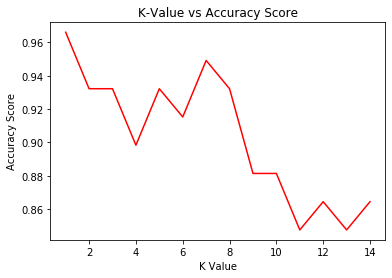

In [11]:
k_max = 15
accuracies = np.zeros(k_max-1)
for k in range(1, k_max):
    pKnn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    knnPred = pKnn.predict(X_test)
    accuracies[k-1] = metrics.accuracy_score(knnPred, y_test)
    print("Accuracy Score: ",metrics.accuracy_score(knnPred, y_test))
    #print("F1-Score: ",metrics.f1_score(knnPred, y_test, average = 'weighted'))
    
plt.plot(range(1,k_max),accuracies, 'r')
plt.xlabel("K Value")
plt.ylabel("Accuracy Score")
plt.title("K-Value vs Accuracy Score")

bestK = accuracies.argmax()+1
print("\nA K-value of %d gives the best accuracy" % bestK)


In [12]:
pKnn = KNeighborsClassifier(n_neighbors = bestK).fit(X_train, y_train)

In [25]:
knnPredictions = pKnn.predict(X_test)
knnAScore = metrics.accuracy_score(knnPredictions, y_test)
knnF1 = metrics.f1_score(knnPredictions, y_test, average = 'weighted')
print("Accuracy Score: ",knnAScore)
print("F1-Score: ",knnF1)

Accuracy Score:  0.9661016949152542
F1-Score:  0.9661016949152542


#### Decision Tree Classifier

In [14]:
pDTree = DecisionTreeClassifier().fit(X_train, y_train)

In [24]:
treePredictions = pDTree.predict(X_test)
treeAScore = metrics.accuracy_score(treePredictions, y_test)
treeF1 = metrics.f1_score(treePredictions, y_test, average = 'weighted')
print("Accuracy Score: ",treeAScore)
print("F1-Score: ",treeF1)

Accuracy Score:  0.7796610169491526
F1-Score:  0.7957718243120101


In [87]:
from sklearn.externals.six import StringIO
import pydotplus #make sure to pip install pydotplus
import matplotlib.image as mpimg
from sklearn import tree

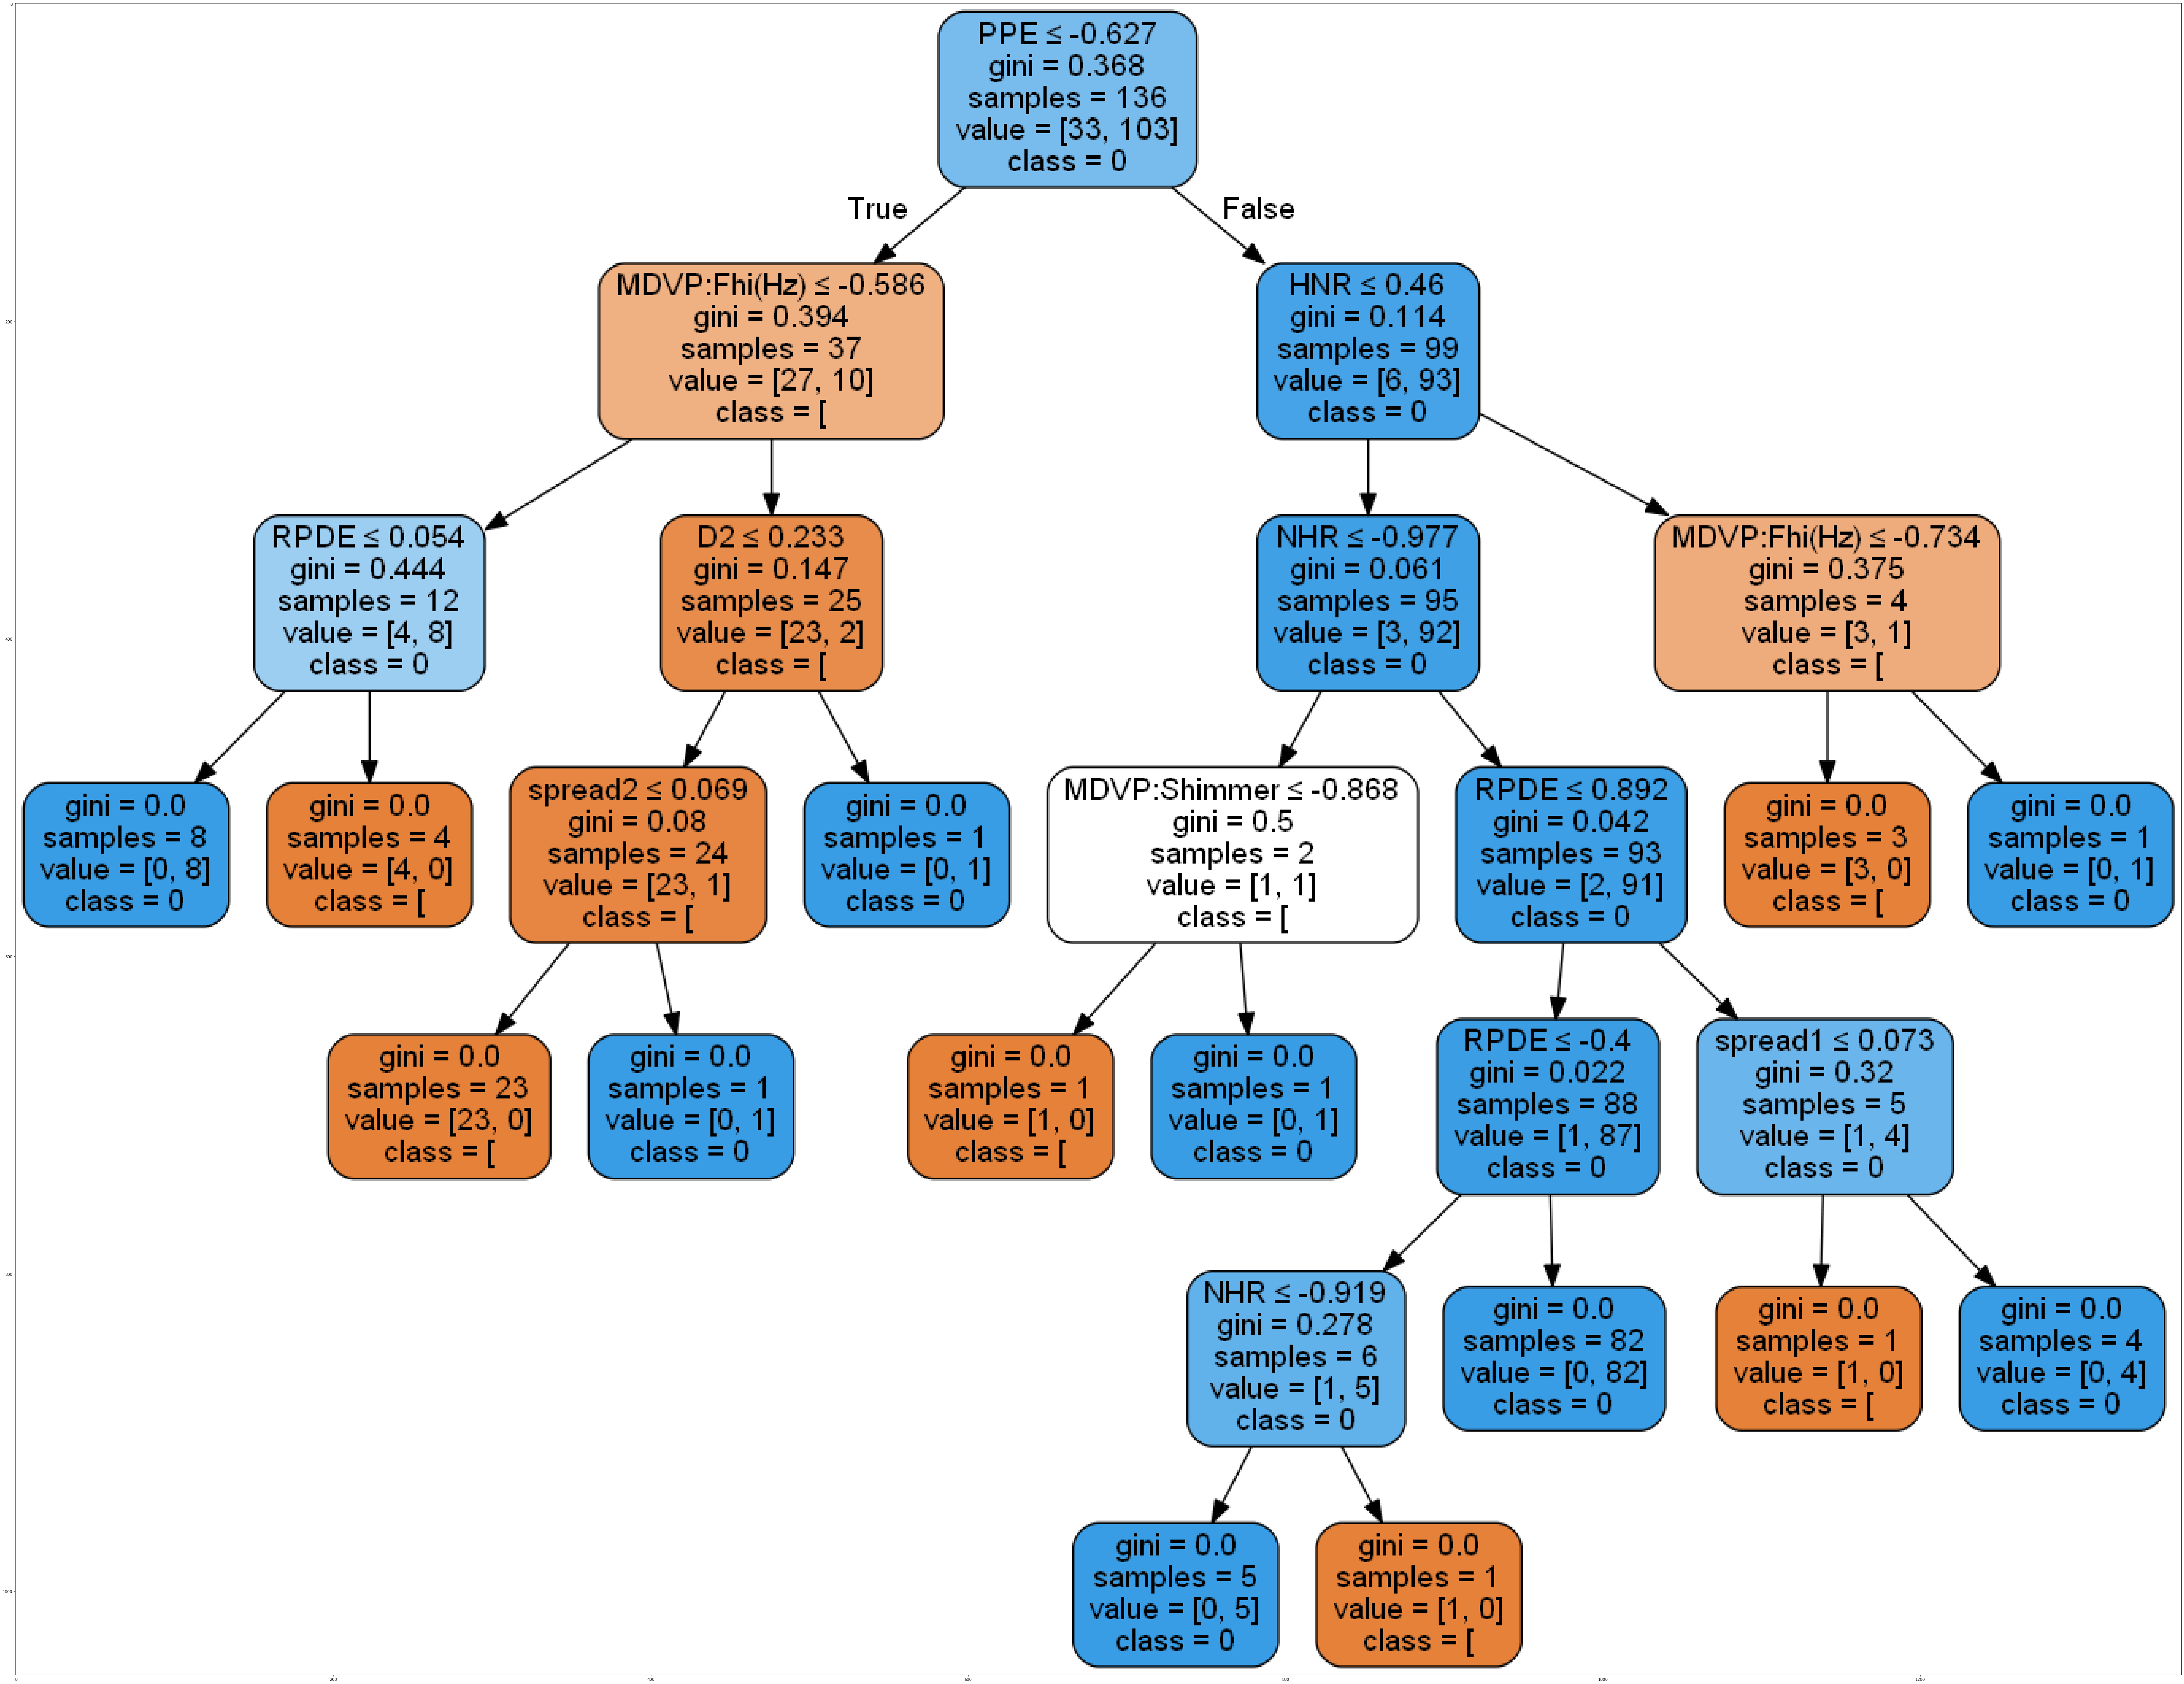

In [21]:
#Tree Visualization
dot_data = StringIO()
filename = "parkinsonsTree.png"
featureNames = df.drop('status', axis = 1).drop('name', axis = 1).columns
targetNames = str(df["status"].unique().tolist())#gets all possible categories
out=tree.export_graphviz(pDTree,feature_names=featureNames, 
                         out_file=dot_data, class_names= str(np.unique(y_train)), filled=True,  
                         special_characters=True,rotate=False, rounded = True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#### Logistic Regression

In [62]:
s = 'liblinear'
pLR = LogisticRegression(C = 0.01, solver = s)
pLR.fit(X_train, y_train)
lrPredict = pLR.predict(X_test)
lrAScore = metrics.accuracy_score(lrPredict, y_test)
lrF1 = metrics.f1_score(lrPredict, y_test, average = 'weighted', labels=np.unique(lrPredict))
print("Accuracy Score: ",lrAScore)
print("F1-Score: ", lrF1, "\n")

Accuracy Score:  0.7457627118644068
F1-Score:  0.8543689320388349 



In [81]:
lrProba = pLR.predict_proba(X_test)
lrLogLoss = metrics.log_loss(y_test,lrProba)#Order of parameters here matter
print("Log Loss: ",lrLogLoss)

Log Loss:  0.5573758724437743


#### Suppor Vector Machine

In [58]:
psvm = svm.SVC(kernel = 'rbf', gamma = 'auto')
psvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
svmPredict = psvm.predict(X_test)
svmAScore = metrics.accuracy_score(svmPredict, y_test)
svmF1 = metrics.f1_score(svmPredict, y_test, average = 'weighted', labels=np.unique(svmPredict))
print("Accuracy Score: ",svmAScore)
print("F1-Score: ", svmF1, "\n")

Accuracy Score:  0.8135593220338984
F1-Score:  0.8571711765288929 



#### Results Table

In [86]:
columnNames = ['Algorithm','Accuracy Score', 'F1-Score', 'Log Loss']
algorithms = ['XGB','KNN','Decision Tree','SVM','Logistic Regression']
aScore = [xgbAScore,knnAScore,treeAScore,svmAScore, lrAScore]
f1 = [xgbF1, knnF1, treeF1, svmF1, lrF1]
logLoss = [None, None, None, None, lrLogLoss]
columnsInOrder = [algorithms, aScore, f1, logLoss]
res_df = pd.DataFrame(columns = columnNames)

for i in range(0,len(columnNames)):
    res_df[columnNames[i]] = columnsInOrder[i]

res_df


,Algorithm,Accuracy Score,F1-Score,Log Loss
0,XGB,0.864407,0.877028,NaN
1,KNN,0.966102,0.966102,NaN
2,Decision Tree,0.779661,0.795772,NaN
3,SVM,0.813559,0.857171,NaN
4,Logistic Regression,0.745763,0.854369,0.557376
